<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Senetence transformers

# Sentence Transformers

In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
# Sentences we want to encode. Example:
sentence = ['This framework generates embeddings for each input sentence']

# Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)

In [5]:
embedding.shape  # (1,384)


(1, 384)

## [Semantic Search](https://www.sbert.net/examples/applications/semantic-search/README.html)
Or query search

Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.
Background

The idea behind semantic search is to embed all entries in your corpus, whether they be sentences, paragraphs, or documents, into a vector space.

At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.

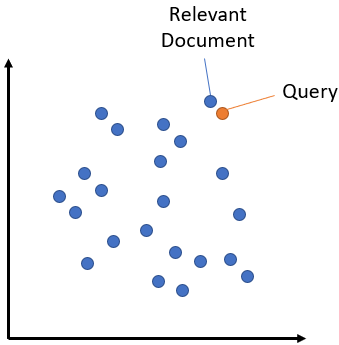

A critical distinction for your setup is symmetric vs. asymmetric semantic search:

>For symmetric semantic search your query and the entries in your corpus are of about the same length and have the same amount of content. An example would be searching for similar questions: Your query could for example be “How to learn Python online?” and you want to find an entry like “How to learn Python on the web?”. For symmetric tasks, you could potentially flip the query and the entries in your corpus.

>For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you want to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.

It is critical that you choose the right model for your type of task.

>Suitable models for symmetric semantic search: [Pre-Trained Sentence Embedding Models](https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models)

>Suitable models for asymmetric semantic search: [Pre-Trained MS MARCO Models](https://www.sbert.net/docs/pretrained-models/msmarco-v3.html)

For small corpora (up to about 1 million entries) we can compute the cosine-similarity between the query and all entries in the corpus. In the following example, we define a small corpus with few example sentences and compute the embeddings for the corpus as well as for our query. We then use the `util.cos_sim()` function to compute the cosine similarity between the query and all corpus entries. For large corpora, sorting all scores would take too much time. Hence, we use `torch.topk` to only get the top k entries.  

For other examples see github [here](https://github.com/UKPLab/sentence-transformers/tree/master/examples/applications/semantic-search).  
An example *symmetric* model that we use in KNIME is `all-MiniLM-L6-v2-f16.gguf`

In [6]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""

from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Corpus with example sentences
corpus = [
    "A man is eating food.",
    "A man is eating a piece of bread.",
    "The girl is carrying a baby.",
    "A man is riding a horse.",
    "A woman is playing violin.",
    "Two men pushed carts through the woods.",
    "A man is riding a white horse on an enclosed ground.",
    "A monkey is playing drums.",
    "A cheetah is running behind its prey.",
]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = [
    "A man is eating pasta.",
    "Someone in a gorilla costume is playing a set of drums.",
    "A cheetah chases prey on across a field.",
]


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)
A man is eating a piece of bread. (Score: 0.5272)
A man is riding a horse. (Score: 0.1889)
A man is riding a white horse on an enclosed ground. (Score: 0.1047)
A cheetah is running behind its prey. (Score: 0.0980)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)
A woman is playing violin. (Score: 0.2564)
A man is riding a horse. (Score: 0.1389)
A man is riding a white horse on an enclosed ground. (Score: 0.1191)
A cheetah is running behind its prey. (Score: 0.1080)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)
A man is eating food. (Score: 0.1399)
A monkey is playing drums. (Score: 0.1292)
A man is riding a white horse on an enclosed ground. (Score: 0.1097)
A man is riding a 

## Approximate Nearest Neighbor

Searching a large corpus with millions of embeddings can be time-consuming if exact nearest neighbor search is used (like it is used by util.semantic_search).

In that case, *Approximate Nearest Neighbor (ANN)* can be helpful. Here, the data is partitioned into smaller fractions of similar embeddings. This index can be searched efficiently and the embeddings with the highest similarity (the nearest neighbors) can be retrieved within milliseconds, even if you have millions of vectors.

However, the results are not necessarily exact. It is possible that some vectors with high similarity will be missed. That’s the reason why it is called approximate nearest neighbor.

For all ANN methods, there are usually one or more parameters to tune that determine the recall-speed trade-off. If you want the highest speed, you have a high chance of missing hits. If you want high recall, the search speed decreases.

Three popular libraries for approximate nearest neighbor are `Annoy`, `FAISS`, and `hnswlib`. Some find `hnswlib` the most suitable library: It is easy to use, offers a great performance and has nice features included that are important for real applications.   
In KNIME we use [FAISS](https://github.com/facebookresearch/faiss)

## Retrieve & Re-Rank
See this [link](https://www.sbert.net/examples/applications/retrieve_rerank/README.html)

For complex semantic search scenarios, a retrieve & re-rank pipeline is advisable:

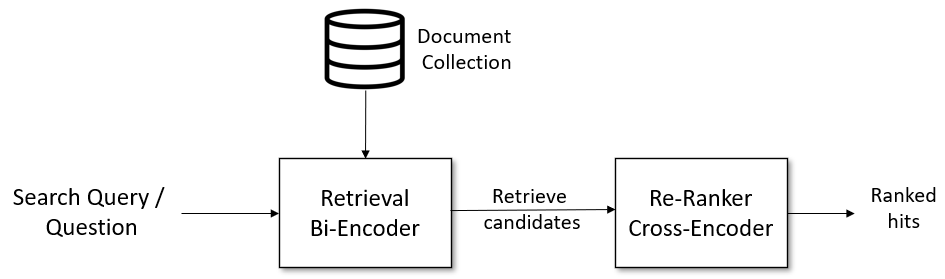

Given a search query, we first use a retrieval system that retrieves a large list of e.g. 100 possible hits which are potentially relevant for the query. For the retrieval, we can use either lexical search, e.g. with Elasticsearch, or we can use dense retrieval with a bi-encoder.

However, the retrieval system might retrieve documents that are not that relevant for the search query. Hence, in a second stage, we use a re-ranker based on a cross-encoder that scores the relevancy of all candidates for the given search query.

The output will be a ranked list of hits we can present to the user.
Retrieval: Bi-Encoder

For the retrieval of the candidate set, we can either use lexical search (e.g. Elasticsearch), or we can use a bi-encoder which is implemented in this repository.

Lexical search looks for literal matches of the query words in your document collection. It will not recognize synonyms, acronyms or spelling variations. In contrast, semantic search (or dense retrieval) encodes the search query into vector space and retrieves the document embeddings that are close in vector space.  
The output will be a ranked list of hits we can present to the user.

### Retrieval: Bi-Encoder


For the retrieval of the candidate set, we can either use lexical search (e.g. Elasticsearch), or we can use a bi-encoder which is implemented in this repository.

Lexical search looks for literal matches of the query words in your document collection. It will not recognize synonyms, acronyms or spelling variations. In contrast, semantic search (or dense retrieval) encodes the search query into vector space and retrieves the document embeddings that are close in vector space.  
Semantic search overcomes the short comings of lexical search and can recognize synonym and acronyms. Have a look at the semantic search article for different options to implement semantic search.

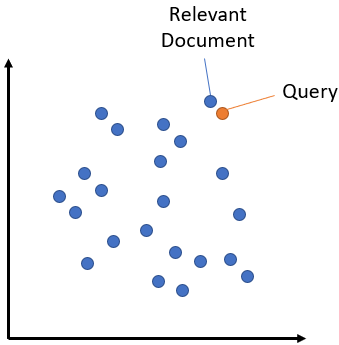

### Re-Ranker: Cross-Encoder

The retriever has to be efficient for large document collections with millions of entries. However, it might return irrelevant candidates.

A re-ranker based on a Cross-Encoder can substantially improve the final results for the user. The query and a possible document is passed simultaneously to transformer network, which then outputs a single score between 0 and 1 indicating how relevant the document is for the given query.

CrossEncoder

The advantage of Cross-Encoders is the higher performance, as they perform attention across the query and the document.

Scoring thousands or millions of (query, document)-pairs would be rather slow. Hence, we use the retriever to create a set of e.g. 100 possible candidates which are then re-ranked by the Cross-Encoder.

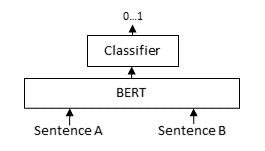

The advantage of Cross-Encoders is the higher performance, as they perform attention across the query and the document.

Scoring thousands or millions of (query, document)-pairs would be rather slow. Hence, we use the retriever to create a set of e.g. 100 possible candidates which are then re-ranked by the Cross-Encoder.   
Examples of pre-trained cross-encoders is [here](https://www.sbert.net/docs/pretrained-models/ce-msmarco.html)

## How FAISS works
See [here](https://towardsdatascience.com/understanding-faiss-619bb6db2d1a)

Let’s use the story above (not described here) as an analogy.

>All the citizens of the kingdom are the vectors in a database and the three tribes correspond to three separate “clusters” or “cells”. The vectors are then assigned to one of these three clusters depending upon a certain similarity measure .(Remember the tribes practised different set of skills that set them apart from each other?). Usually the L2 distance measure along with a clustering algorithm like K-means is used for this.

>Like the tribe chiefs in our story, each cluster is represented by a cluster centroid or “code” . And just like the ministers’ “master book” , a separate “codebook” is maintained that keeps track of the code (or cluster centroid) and its corresponding vectors for each cluster. This is essentially the “Inverted File” or index.

>A Quantiser is used to decide which cluster the vector belongs to (I guess this was primarily the queen’s job). So when a query vector comes in (like the travellers in our story), a suitable cluster (or clusters) is found for the query vector based on its similarity with the cluster centres (just like the tribe chiefs who selected the travellers based on their characteristics). Finally, a select number of similar vectors within the selected cluster(s) that are returned as the query result (like the citizens of the city who volunteered to house a traveller). This can be seen as a very basic working of the inverted index.

Faiss allows us to add multiple steps that can optimize our search using many different methods. A popular approach is to partition the index into Voronoi cells.

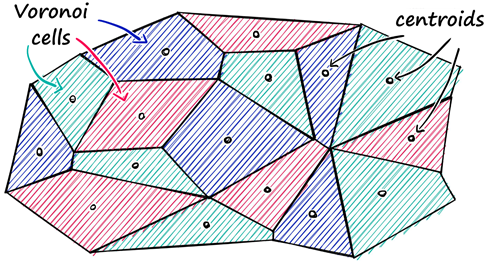

Using this method, we would take a query vector `xq`, identify the cell it belongs to, and then use our `IndexFlatL2` (or another metric) to search between the query vector and all other vectors belonging to that specific cell.

So, we are reducing the scope of our search, producing an approximate answer, rather than exact (as produced through exhaustive search).

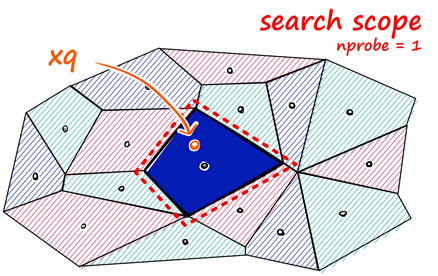

## What is vector store

## What is LLM Prompter